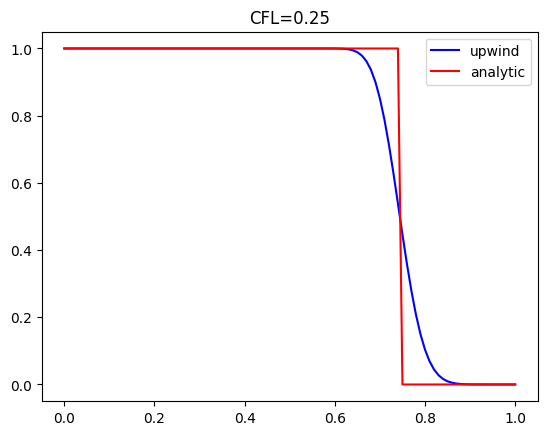

In [1]:
import numpy as np
import matplotlib.pyplot as plt
L,T = 1.0, 0.25
N,M = 100, 100
dx,dt = L/N, T/M
a = 1.0
lmbd = a*dt / dx



x = np.linspace(0, L, N+1)

U = np.zeros(shape = (N+1, M+1))

def u0(x):
  return 1.0*(x<L/2) + 0.0
  #return np.array([1.0 if xi < L/2 else 0.0 for xi in x])

def u_exact(x,t):
  return u0(x-a*t)

U[:,0] = u0(x)
U[0,:] = u0(x[0]);

for n in range(M):

  #U[1:,n+1] = U[1:,n] - lmbd*(U[1:,n] - U[:-1,n])

  for i in range(N):
    U[1+i, n+1] = U[i+1, n] - lmbd*(U[i+1,n]-U[0+i,n])


plt.plot(x, U[:,-1], color = 'b', label='upwind')
plt.plot(x, u0(x-a*T), color = 'r', label='analytic')
plt.legend()
plt.title(f'CFL={lmbd}')
plt.show()